In [1]:
import os
import argparse
import train
%matplotlib inline

#### Choices of window size

| Groups | Window_Size |
|--|--|
| Dynamic | 200 |
| Agree | 100 |
| Static | 5 |

## Get training misclassified indices for static model

In [14]:
parser = argparse.ArgumentParser(description='Machine learning method on classification of human activities from skeleton data')

###### datasets parameters ######
parser.add_argument('--exp_group',type=str,default='Dynamic',
                choices=['Dynamic','Agree','Static'],
                help='Select one group of training & testing')
parser.add_argument('--desired_features',type=str,default='dataset/desired_features.yaml',help='load features name from .yaml')
parser.add_argument('--split_ratio', type=float, default=0.9, help='the ratio for number of samples in trainset')
parser.add_argument('--window_size', type=int, default=200, help='the ratio for number of samples in trainset')
parser.add_argument('--outside_test',type=int,default=1,help='1: use extra testset; 0: extract testset from trainset')
parser.add_argument('--save_res',type=int,default=1,help='True: save plot; False: show plot')

###### models configuration ######
# select a model
parser.add_argument('--model', type=str, default='RandomForest', choices=['KNN','RandomForest','SVM'])
# for KNN
parser.add_argument('--n_neighbor', type=int, default=20, help='number of neighbours, only for KNN')
# for RandomForest
parser.add_argument('--max_depth', type=int, default=6, help='max depth for random forest')
parser.add_argument('--random_state', type=int, default=0, help='random state for random forest')

args = parser.parse_args([])

coords shape: (18000, 3, 26)
cog shape: (18000, 1, 3)
loaded original x_data shape: (18000, 92)
loaded original y_data shape: (18000,)

x_data with window has shape: (17970, 5, 92)
y_data with window has shape: (17970,)



/home/hardli/IAW/Motion_Classification_Thesis_IAW_RWTH/util/features.py:253: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Kurtosis = kurtosis(data,axis=1)
/home/hardli/IAW/Motion_Classification_Thesis_IAW_RWTH/util/features.py:272: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Skewness = skew(data,axis=1)


x_data with window features has shape: (17970, 644)
y_data with window features has shape: (17970,)

coords shape: (8529, 3, 26)
cog shape: (8529, 1, 3)
loaded original x_data shape: (8529, 92)
loaded original y_data shape: (8529,)

x_data with window has shape: (8499, 5, 92)
y_data with window has shape: (8499,)



/home/hardli/IAW/Motion_Classification_Thesis_IAW_RWTH/util/features.py:253: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Kurtosis = kurtosis(data,axis=1)
/home/hardli/IAW/Motion_Classification_Thesis_IAW_RWTH/util/features.py:272: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Skewness = skew(data,axis=1)


x_data with window features has shape: (8499, 644)
y_data with window features has shape: (8499,)

x_train shape: (16170, 644)
y_train shape: (16170,)
x_test shape: (8499, 644)
y_test shape: (8499,)

Result on RandomForest:
P_pred: type: <class 'numpy.ndarray'>, shape: (8499, 6)
probability of predicted target: [[7.7519768e-01 7.6623924e-02 1.1508494e-01 4.9261085e-05 3.0442183e-03
  2.9999999e-02]
 [7.7519768e-01 7.6623924e-02 1.1508494e-01 4.9261085e-05 3.0442183e-03
  2.9999999e-02]
 [7.7519768e-01 7.6623924e-02 1.1508494e-01 4.9261085e-05 3.0442183e-03
  2.9999999e-02]
 ...
 [2.6580861e-01 0.0000000e+00 9.6791340e-03 7.2450489e-01 0.0000000e+00
  7.3800738e-06]
 [2.6774177e-01 0.0000000e+00 9.6791340e-03 7.2257173e-01 0.0000000e+00
  7.3800738e-06]
 [2.5828096e-01 0.0000000e+00 9.6791340e-03 7.3203254e-01 0.0000000e+00
  7.3800738e-06]]
predicted target: [0 0 0 ... 3 3 3]
true target: [0 0 0 ... 3 3 3]
Accuracy = 0.9835274738204495
Result: [ True  True  True ...  True  True  True]


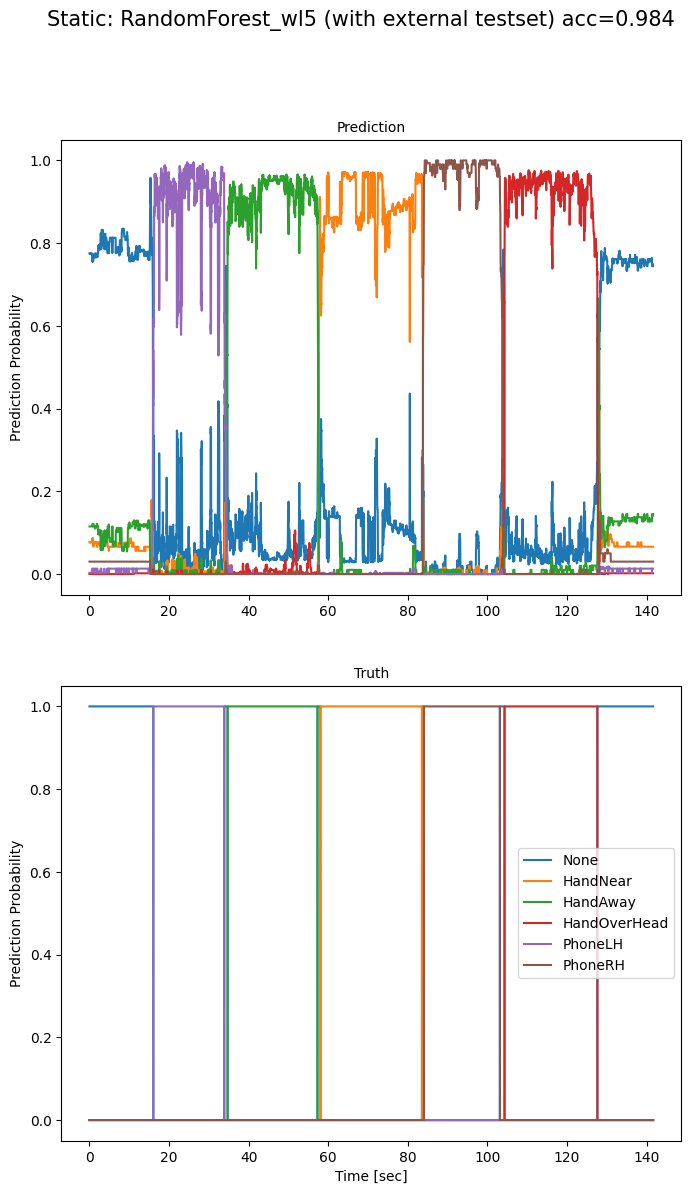

In [15]:
# train model
cls_model = train.main(ext_args=args)

In [16]:
# get misclassified index
cls_model.misclass_index()

The misclassified windows has shape: (140, 2)
Examine the windows with these indices in data_visualization.py:
idx of misclassified window | check on dataset with:[start_frame, end_frame] | truth | prediction
957 | [957 961] | 0 | 4
958 | [958 962] | 0 | 4
959 | [959 963] | 0 | 4
960 | [960 964] | 0 | 4
2033 | [963 967] | 0 | 4
2034 | [964 968] | 0 | 4
2035 | [965 969] | 0 | 4
2036 | [966 970] | 0 | 4
2037 | [967 971] | 0 | 4
2038 | [968 972] | 0 | 4
2039 | [969 973] | 0 | 4
2040 | [970 974] | 0 | 4
2041 | [971 975] | 0 | 4
2042 | [972 976] | 0 | 4
2043 | [973 977] | 0 | 4
2077 | [1007 1011] | 0 | 2
2078 | [1008 1012] | 0 | 2
2079 | [1009 1013] | 0 | 2
2080 | [1010 1014] | 0 | 2
2081 | [1011 1015] | 0 | 2
2082 | [1012 1016] | 0 | 2
3438 | [1013 1017] | 0 | 2
3439 | [1014 1018] | 0 | 2
3440 | [1015 1019] | 0 | 2
3441 | [1016 1020] | 0 | 2
3442 | [1017 1021] | 0 | 2
3443 | [1018 1022] | 0 | 2
3444 | [1019 1023] | 0 | 2
3445 | [1020 1024] | 0 | 2
3446 | [1021 1025] | 0 | 2
3457 | [1032 10